# Recupération du csv et declaration du Mapping des ratings

In [1]:
import pandas as pd
import numpy as np
import sklearn
import re
import string
from time import time
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn_pandas import DataFrameMapper

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [1]:
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

import pandas as pd
full_df=pd.read_csv('C:/Users/vince/Documents/Cours/M1/project_datas/datas/datas.csv',sep=',', engine='python')
from enum import Enum
from typing import Dict


class NormalizedRatings(Enum):
    FALSE = 1
    MIXTURE = 2
    TRUE = 3
    OTHER = -1


_normalization_dictionary = {  # type: Dict[str, Dict[str,NormalizedRatings]]

    "politifact": {  # type: Dict[str,NormalizedRatings]
        'incorrect': NormalizedRatings.FALSE,
        'pants-fire': NormalizedRatings.FALSE,
        'pants on fire': NormalizedRatings.FALSE,
        'pants on fire!': NormalizedRatings.FALSE,
        'false': NormalizedRatings.FALSE,
        'mostly correct': NormalizedRatings.MIXTURE,
        'mostly false': NormalizedRatings.MIXTURE,
        'barely true': NormalizedRatings.MIXTURE,
        'half true': NormalizedRatings.MIXTURE,
        'half-true': NormalizedRatings.MIXTURE,
        'mostly true': NormalizedRatings.MIXTURE,
        'true': NormalizedRatings.TRUE,
        'correct': NormalizedRatings.TRUE
    },
    "snopes": {  # type: Dict[str,NormalizedRatings]
        'false': NormalizedRatings.FALSE,
        'legend': NormalizedRatings.FALSE,
        'mixture': NormalizedRatings.MIXTURE,
        'mixture:': NormalizedRatings.MIXTURE,
        'true': NormalizedRatings.TRUE,
        'mostly false': NormalizedRatings.MIXTURE,
        'mostly true': NormalizedRatings.MIXTURE,
        'partly true': NormalizedRatings.MIXTURE,
        'MIXTURE OF TRUE AND FALSE INFORMATION': NormalizedRatings.MIXTURE,
        'MIXTURE OF TRUE AND FALSE INFORMATION:': NormalizedRatings.MIXTURE,
        'MIXTURE OF ACCURATE AND  INACCURATE INFORMATION': NormalizedRatings.MIXTURE
    },
    "africacheck": {  # type: Dict[str,NormalizedRatings]
        'incorrect': NormalizedRatings.FALSE,
        'mostly-correct': NormalizedRatings.MIXTURE,
        'correct': NormalizedRatings.TRUE
    },
    "factscan": {  # type: Dict[str,NormalizedRatings]
        'false': NormalizedRatings.FALSE,
        'true': NormalizedRatings.TRUE,
        'Misleading': NormalizedRatings.OTHER
    },
    "truthorfiction": {  # type: Dict[str,NormalizedRatings]
        'fiction': NormalizedRatings.FALSE,
        'truth': NormalizedRatings.TRUE,
        'truth & fiction': NormalizedRatings.MIXTURE,
        'mostly fiction': NormalizedRatings.MIXTURE,
        'truth & misleading': NormalizedRatings.MIXTURE,
        'mostly truth': NormalizedRatings.MIXTURE
    },
    "checkyourfact": {  # type: Dict[str,NormalizedRatings]
        'False': NormalizedRatings.FALSE,
        'True': NormalizedRatings.TRUE,
        'Mostly True': NormalizedRatings.MIXTURE,
        'true/false': NormalizedRatings.MIXTURE,
        'truth & misleading': NormalizedRatings.MIXTURE,
        'mostly truth': NormalizedRatings.MIXTURE,
        'misleading': NormalizedRatings.MIXTURE
    },
    "factcheck_aap": {
        "True": NormalizedRatings.TRUE,
        "False": NormalizedRatings.FALSE,
        "Mostly True": NormalizedRatings.MIXTURE,
        "Mostly False": NormalizedRatings.MIXTURE,
        "Somewhat True": NormalizedRatings.MIXTURE,
        "Somewhat False": NormalizedRatings.MIXTURE
    },
    "factuel_afp_fr": {
        'Faux': NormalizedRatings.FALSE,
        'Totalement faux': NormalizedRatings.FALSE,
        'Démenti': NormalizedRatings.FALSE,
        "C'est une oeuvre de fiction": NormalizedRatings.FALSE,
        'Vrai': NormalizedRatings.TRUE,
        'Totalement Vrai': NormalizedRatings.TRUE,
        'Plutôt vrai': NormalizedRatings.MIXTURE,
        'Trompeur': NormalizedRatings.MIXTURE,
        'trompeur': NormalizedRatings.MIXTURE,
        'Plutôt faux': NormalizedRatings.MIXTURE,
        'Presque': NormalizedRatings.MIXTURE,
        'Mélangé': NormalizedRatings.MIXTURE,
        'Mélange': NormalizedRatings.MIXTURE,
        'Inexact': NormalizedRatings.MIXTURE,
        'Incertain': NormalizedRatings.MIXTURE,
        'Imprécis': NormalizedRatings.MIXTURE,
        'Exagéré': NormalizedRatings.MIXTURE,
        'Douteux': NormalizedRatings.MIXTURE,

    },
    "factcheck_afp": {
        'False': NormalizedRatings.FALSE,
        'Fake': NormalizedRatings.FALSE,
        'Mixed': NormalizedRatings.MIXTURE,
        'Hoax': NormalizedRatings.FALSE,
        'Falso': NormalizedRatings.FALSE,
        'APRIL FOOL': NormalizedRatings.FALSE
    },
    "fullfact": {
        'Correct': NormalizedRatings.TRUE,
        'Incorrect': NormalizedRatings.FALSE,
        'Not quite': NormalizedRatings.MIXTURE
    }
}


def _standardize_name(original_name: str):
    return original_name.strip().lower().replace("!", "").replace(":", "").replace("-", " ")


def normalize(source_name, original_name) -> NormalizedRatings:
    """
        Generate a normalized rating from the original ratings on each respective site
    :param original_name:
    :return normalized_rating: NormalizedRating
    """
    try:
        source = _normalization_dictionary[source_name]
        normalized_value = source[_standardize_name(original_name)]
    except KeyError:
        normalized_value = NormalizedRatings.OTHER
    return normalized_value



### Check empty colonne

In [3]:
full_df=full_df.replace("[]",np.NaN)

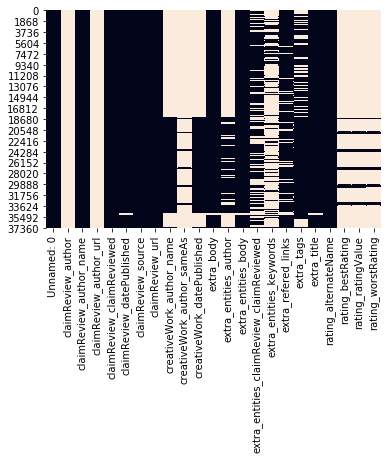

In [4]:
sns.heatmap(full_df.isnull(), cbar=False)


## Supression des valeurs null des colonnes importantes 

In [5]:

# Get names of indexes for which column alternateName is null
indexNames = full_df[ full_df['rating_alternateName'].isnull() | full_df['claimReview_claimReviewed'].isnull() | full_df['claimReview_datePublished'].isnull()].index


# Delete these row indexes from dataFrame
full_df.drop(indexNames , inplace=True)



In [6]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37687 entries, 0 to 38833
Data columns (total 23 columns):
Unnamed: 0                                  37687 non-null int64
claimReview_author                          0 non-null float64
claimReview_author_name                     37687 non-null object
claimReview_author_url                      0 non-null float64
claimReview_claimReviewed                   37687 non-null object
claimReview_datePublished                   37687 non-null object
claimReview_source                          37687 non-null object
claimReview_url                             37687 non-null object
creativeWork_author_name                    16831 non-null object
creativeWork_author_sameAs                  1310 non-null object
creativeWork_datePublished                  16819 non-null object
extra_body                                  37685 non-null object
extra_entities_author                       13761 non-null object
extra_entities_body                      

## Traitement des urls

In [7]:
def getUrl(originalUrl):
    if (isinstance(originalUrl, str)) :
        tab=originalUrl.split('/')
        if(len(tab)>2):
            return tab[2].replace("www.","")
        else :
            return ""

    else :
        return ""

full_df['cleanUrl'] = full_df['extra_refered_links'].apply(lambda x : getUrl(x))

In [8]:
full_df.head()

,Unnamed: 0,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,...,extra_entities_claimReview_claimReviewed,extra_entities_keywords,extra_refered_links,extra_tags,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating,cleanUrl
0,0,NaN,snopes,NaN,Finnish President Sauli Niinistö posted a vide...,2019-10-07,snopes,https://www.snopes.com/fact-check/president-fi...,NaN,NaN,...,"[{""id"" : 1042690"",""""begin"": 18,""end"": 32,""enti...",NaN,"https://t.co/Oo5Q56ALAu,https://twitter.com/ia...",NaN,Did the President of Finland Post a Video Resp...,False,NaN,NaN,NaN,t.co
1,1,NaN,snopes,NaN,A supporter of U.S. Rep. Alexandria Ocasio-Cor...,2019-10-04,snopes,https://www.snopes.com/fact-check/babies-clima...,NaN,NaN,...,"[{""id"" : 54885332"",""""begin"": 22,""end"": 45,""ent...",NaN,https://twitter.com/redsteeze/status/117991491...,NaN,Did an AOC Supporter Suggest ‘Eating Babies’ t...,Mixture,NaN,NaN,NaN,twitter.com
2,2,NaN,snopes,NaN,A photograph shows a bride and groom during a ...,2019-10-04,snopes,https://www.snopes.com/fact-check/handmaid-tal...,NaN,NaN,...,"[{""id"" : 50430110"",""""begin"": 46,""end"": 61,""ent...",NaN,https://twitter.com/God_loves_women/status/117...,NaN,Is This a Photo of a ‘Handmaid’s Tale’-Themed ...,Miscaptioned,NaN,NaN,NaN,twitter.com
3,3,NaN,snopes,NaN,Canada legalized the medicinal use of cocaine.,2019-10-04,snopes,https://www.snopes.com/fact-check/medicinal-co...,NaN,NaN,...,"[{""id"" : 7701"",""""begin"": 38,""end"": 45,""entity""...",NaN,https://web.archive.org/web/20191004171021/htt...,NaN,Did Canada Legalize the Medicinal Use of Cocaine?,Labeled Satire,NaN,NaN,NaN,web.archive.org
4,4,NaN,snopes,NaN,"In September 2019, U.S. President Donald Trump...",2019-10-04,snopes,https://www.snopes.com/fact-check/trump-autism...,NaN,NaN,...,"[{""id"" : 4848272"",""""begin"": 31,""end"": 43,""enti...",NaN,"http://archive.is/ymlJP,http://archive.is/JgYP...",NaN,Did Donald Trump Sign a $1.8 Billion Autism-Se...,True,NaN,NaN,NaN,archive.is


## Extraction des extra entities

In [9]:
import json

def jsonString(extraEntity):
    extraEntity=str(extraEntity)
    return extraEntity.replace('",""begin"', ',"begin"')

def getEntity(entityClean):
    try : 
        data = json.loads(entityClean)
        return [item['entity'] for item in data]
        
    except ValueError:
        return ''

def stringify(liste):
    if liste == "NaN" or not liste:
        return ""
    else:
        return ', '.join(liste)

def getUrl(originalUrl):
    if (isinstance(originalUrl, str)) :
        return originalUrl.split('/')[2].replace("www.","")
    else :
        return ""

full_df['clean_extra_claimReviewed'] = full_df['extra_entities_claimReview_claimReviewed'].apply(lambda x: jsonString(x))

full_df['entity'] = full_df['clean_extra_claimReviewed'].apply(lambda x: getEntity(x))
full_df['entity'] = full_df['entity'].apply(lambda x: stringify(x))

full_df=full_df.drop(columns=["clean_extra_claimReviewed"])    


In [10]:
full_df.sample(200)

,Unnamed: 0,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,...,extra_entities_keywords,extra_refered_links,extra_tags,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating,cleanUrl,entity
30502,12027,NaN,politifact,NaN,The Obama administration’s 2013 Syria proposal...,2019-10-16,politifact,http://www.politifact.com/truth-o-meter/statem...,Marco Rubio,NaN,...,NaN,http://www.cq.com/doc/newsmakertranscripts-508...,Foreign Policy,Donald Trump's Syria strike looks a lot like B...,False,7.0,5.0,NaN,cq.com,"Presidency of Barack Obama, 2013 in Syria"
20838,2363,NaN,politifact,NaN,"Republicans """"are advancing federal judges who...",2019-10-10,politifact,http://www.politifact.com/punditfact/statement...,Roland Martin,NaN,...,NaN,https://www.nytimes.com/2019/07/16/us/politics...,"Congress,Legal Issues,Pundits,Supreme Court",Have Trump judicial nominees refused to say Br...,Mostly True,NaN,NaN,NaN,nytimes.com,Brown v. Board of Education
20261,1786,NaN,politifact,NaN,"""""Following the 2009 session,"""" Texas House Sp...",2019-10-15,politifact,http://www.politifact.com/texas/statements/201...,Heidi Group,NaN,...,NaN,NaN,Abortion,"Activists say Planned Parenthood, nation's pre...",True,NaN,NaN,NaN,,"Speaker of the Texas House of Representatives,..."
32335,13860,NaN,politifact,NaN,"The government will """"go out and buy my breast...",2011-02-18,politifact,http://www.politifact.com/truth-o-meter/statem...,Michele Bachmann,NaN,...,NaN,NaN,"Health Care,Taxes,Women",Michele Bachmann says the government will buy ...,False,NaN,NaN,NaN,,Breast pump
24415,5940,NaN,politifact,NaN,"""""One in five American households have nobody ...",2019-10-10,politifact,http://www.politifact.com/truth-o-meter/statem...,Mike Pence,NaN,...,"[{""id"" : 314993"",""""begin"": 17,""end"": 21,""entit...",http://www.cq.com/doc/newsmakertranscripts-498...,"Economy,Families,Jobs,Workers",Is Mike Pence right that 1 in 5 U.S. household...,Half-True,NaN,NaN,NaN,cq.com,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36180,234,NaN,truthorfiction,NaN,A cook and a janitor stayed at an abandoned ca...,2019-06-21,truthorfiction,https://www.truthorfiction.com/did-the-cook-an...,NaN,NaN,...,NaN,https://www.truthorfiction.com/category/fact-c...,NaN,Did the Cook and Janitor of a Bankrupt Assiste...,True,NaN,NaN,NaN,truthorfiction.com,
32155,13680,NaN,politifact,NaN,"""""Under our (2011-’13) budget, the average (Wi...",2019-10-14,politifact,http://www.politifact.com/wisconsin/statements...,Scott Walker,NaN,...,"[{""id"" : 4360909"",""""begin"": 0,""end"": 12,""entit...",http://media.jsonline.com/documents/Walker+col...,"State Budget,State Finances,Taxes",Gov. Scott Walker says average property tax pa...,False,NaN,NaN,NaN,media.jsonline.com,
1004,1004,NaN,snopes,NaN,A photograph shows U.S. Rep. Alexandria Ocasio...,2019-02-19,snopes,https://www.snopes.com/fact-check/ocasio-corte...,NaN,NaN,...,"[{""id"" : 54885332"",""""begin"": 0,""end"": 23,""enti...",https://www.snopes.com/fact-check/alexandria-o...,Alexandria Ocasio-Cortez,Is This a Photo of Alexandria Ocasio-Cortez Be...,False,NaN,NaN,NaN,snopes.com,Alexandria Ocasio-Cortez
36936,990,NaN,truthorfiction,NaN,Bucket List for 2014,2015-03-17,truthorfiction,https://www.truthorfiction.com/bucket-list-2014/,NaN,NaN,...,NaN,https://www.truthorfiction.com/category/crime-...,NaN,Bucket List for 2014-Grass Roots Movement!,Grass Roots Movement!,NaN,NaN,NaN,truthorfiction.com,


## Création d'une nouvelle colonnes aprés extraction de l'auteur

In [11]:
counter=0

for index,row in full_df.iterrows():
    if pd.isna(row["extra_entities_author"]):
        counter+=1
        
print(counter) 


23926


In [12]:
import re
#montre toute la ligne
#pd.set_option('display.max_colwidth', None)
full_df["extra_entities_author"] = full_df["extra_entities_author"].astype(str)

full_df["author_name"]=""
for index,row in full_df.iterrows():
    if(pd.notnull(str(row["extra_entities_author"]))):
        if ("entity" in row["extra_entities_author"]):
            m = re.search('"entity":(.+?),', row["extra_entities_author"])
            if(m):
                h=str(m.group(1))
                h=h.replace('"','')
                full_df.at[index,"author_name"]=h
                           

full_df=full_df.drop(columns=["extra_entities_author"])    

full_df.sample(20)


,Unnamed: 0,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,...,extra_refered_links,extra_tags,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating,cleanUrl,entity,author_name
10980,10980,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,...,http://www.latinospost.com/articles/58418/2015...,supernatural,The Sound of Apocalypse,Mixture,NaN,NaN,NaN,latinospost.com,,
18584,109,NaN,politifact,NaN,"""""Thousands of folks are opening West Virginia...",2019-10-09,politifact,http://www.politifact.com/west-virginia/statem...,Jim Justice,https://twitter.com/WVGovernor/status/10341988...,...,https://twitter.com/WVGovernor/status/10341988...,Transportation,Are thousands of West Virginians signing up fo...,True,7.0,6.0,1.0,twitter.com,"West Virginia, E-ZPass",Jim Justice
15043,15043,NaN,snopes,NaN,Videos have captured strange apocalyptic sound...,2015-04-30,snopes,https://www.snopes.com/fact-check/the-sound-of...,NaN,NaN,...,http://www.latinospost.com/articles/58418/2015...,supernatural,The Sound of Apocalypse,Mixture,NaN,NaN,NaN,latinospost.com,,
23212,4737,NaN,politifact,NaN,"""""When I became president and CEO of Godfather...",2019-10-11,politifact,http://www.politifact.com/truth-o-meter/statem...,Herman Cain,NaN,...,https://www.politifact.com/truth-o-meter/artic...,"Candidate Biography,Corporations",Did Herman Cain turn around Godfather's Pizza?,Mostly True,NaN,NaN,NaN,politifact.com,Godfather's Pizza,Herman Cain
15164,15164,NaN,snopes,NaN,The “real McCoy” refers to a type of automatic...,2011-02-19,snopes,https://www.snopes.com/fact-check/the-real-mccoy/,NaN,NaN,...,http://www.cyberboxingzone.com/boxing/Article-...,"ASP Article, Eponyms",Etymology of ‘the Real McCoy’,FALSE,NaN,NaN,NaN,cyberboxingzone.com,Real McCoy (band),
7518,7518,NaN,snopes,NaN,Prophylactic maker Durex is producing an eggpl...,2016-09-08,snopes,https://www.snopes.com/fact-check/durex-to-pro...,NaN,NaN,...,https://twitter.com/hashtag/BreakingNews?src=h...,"condoms, durex, emoji",Durex to Produce Eggplant-Flavored Condoms,False,NaN,NaN,NaN,twitter.com,"Durex, Condom",
31246,12771,NaN,politifact,NaN,"""""Thanks to #ObamaCare, average E.R. wait in C...",2014-07-08,politifact,http://www.politifact.com/truth-o-meter/statem...,Reince Priebus,NaN,...,https://twitter.com/Reince/status/486162759269...,Health Care,RNC chair Reince Priebus 'thanks' Barack Obama...,False,NaN,NaN,NaN,twitter.com,,Reince Priebus
8084,8084,NaN,snopes,NaN,"Monica Lewinsky offered to """"take one for (the...",2019-10-04,snopes,https://www.snopes.com/fact-check/monica-lewin...,NaN,NaN,...,https://www.snopes.com/tachyon/2019/10/monica-...,NaN,Did Monica Lewinsky Offer to ‘Take One For (th...,False,NaN,NaN,NaN,snopes.com,"Monica Lewinsky, Oral sex, Donald Trump",
37450,18,NaN,checkyourfact,NaN,"Was Hunter Biden Paid As Much As $50,000 A Mon...",2019-10-17,checkyourfact,https://checkyourfact.com/2019/10/17/fact-chec...,NaN,NaN,...,https://www.businessinsider.com/ukraine-gas-co...,NaN,"Was Hunter Biden Paid As Much As $50,000 A Mon...",Unsubstantiated,NaN,NaN,NaN,businessinsider.com,Hunter Biden,
9914,9914,NaN,snopes,NaN,"Monica Lewinsky offered to """"take one for (the...",2019-10-04,snopes,https://www.snopes.com/fact-check/monica-lewin...,NaN,NaN,...,https://www.snopes.com/tachyon/2019/10/monica-...,NaN,Did Monica Lewinsky Offer to ‘Take One For (th...,False,NaN,NaN,NaN,snopes.com,"Monica Lewinsky, Oral sex, Donald Trump",


## Traitement de la date

In [13]:
full_df["claimReview_datePublished"] = full_df["claimReview_datePublished"].astype(str)

full_df['claimReview_datePublished'] =  pd.to_datetime(full_df['claimReview_datePublished'])

# Reset our index so datetime_utc becomes a column

# Create new columns
full_df['day'] = full_df['claimReview_datePublished'].dt.day
full_df['month'] = full_df['claimReview_datePublished'].dt.month
full_df['year'] = full_df['claimReview_datePublished'].dt.year

full_df=full_df.drop(columns=["claimReview_datePublished"])    



In [14]:
full_df.head()

,Unnamed: 0,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,creativeWork_datePublished,...,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating,cleanUrl,entity,author_name,day,month,year
0,0,NaN,snopes,NaN,Finnish President Sauli Niinistö posted a vide...,snopes,https://www.snopes.com/fact-check/president-fi...,NaN,NaN,NaN,...,False,NaN,NaN,NaN,t.co,"Sauli Niinistö, White House, Donald Trump",,7,10,2019
1,1,NaN,snopes,NaN,A supporter of U.S. Rep. Alexandria Ocasio-Cor...,snopes,https://www.snopes.com/fact-check/babies-clima...,NaN,NaN,NaN,...,Mixture,NaN,NaN,NaN,twitter.com,"Alexandria Ocasio-Cortez, Climate change",,4,10,2019
2,2,NaN,snopes,NaN,A photograph shows a bride and groom during a ...,snopes,https://www.snopes.com/fact-check/handmaid-tal...,NaN,NaN,NaN,...,Miscaptioned,NaN,NaN,NaN,twitter.com,The Handmaid's Tale (TV series),,4,10,2019
3,3,NaN,snopes,NaN,Canada legalized the medicinal use of cocaine.,snopes,https://www.snopes.com/fact-check/medicinal-co...,NaN,NaN,NaN,...,Labeled Satire,NaN,NaN,NaN,web.archive.org,Cocaine,,4,10,2019
4,4,NaN,snopes,NaN,"In September 2019, U.S. President Donald Trump...",snopes,https://www.snopes.com/fact-check/trump-autism...,NaN,NaN,NaN,...,True,NaN,NaN,NaN,archive.is,"Donald Trump, Autism",,4,10,2019


## Mapping des ratings

In [15]:
List=[]
for index,row in full_df.iterrows():
    List.append(normalize(row['claimReview_author_name'],row['rating_alternateName']).value)

full_df['truth_rating']=List



## Supression des colonnes trop vides ou pas assez importantes

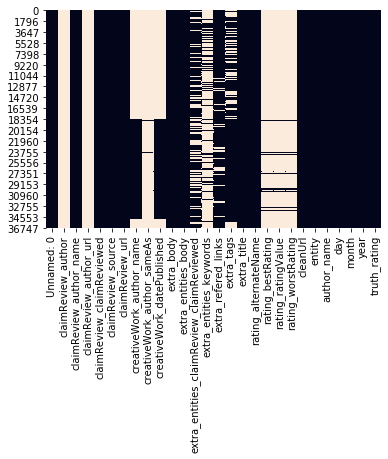

In [16]:
sns.heatmap(full_df.isnull(), cbar=False)

In [3]:
#Pour l'instant les attributs qu'on prends 
#- claimReview_claimReviewed
#-

#Ce qu'on prends pas 
#-claimReview_author
#-claimReview_author_url
#-creativeWork_author_sameAs
#-rating_bestRating                           
#-rating_ratingValue                          
#-rating_worstRating      
#-claimReview_source                 
#-claimReview_url
#-creativeWork_author_name                    
#-creativeWork_author_sameAs                  
#-creativeWork_datePublished   

#supprimer les colonnes 
df=full_df.drop(columns=['Unnamed: 0','claimReview_author', 'claimReview_author_url','creativeWork_author_sameAs','rating_bestRating','rating_ratingValue',
                     'rating_worstRating','claimReview_source','claimReview_url','creativeWork_author_name','creativeWork_author_sameAs',
                     'creativeWork_datePublished','extra_title','rating_alternateName','claimReview_author_name','extra_body','extra_tags','extra_refered_links','extra_entities_body','extra_entities_keywords','extra_entities_claimReview_claimReviewed'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39218 entries, 0 to 39217
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   claimReview_claimReviewed  39216 non-null  object
 1   claimReview_datePublished  37913 non-null  object
 2   extra_entities_author      39218 non-null  object
dtypes: object(3)
memory usage: 919.3+ KB


### Vérifaction des elements null

In [18]:
df.isnull().sum()

claimReview_claimReviewed    0
cleanUrl                     0
entity                       0
author_name                  0
day                          0
month                        0
year                         0
truth_rating                 0
dtype: int64

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [19]:
df.head(20)

,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
0,Finnish President Sauli Niinistö posted a vide...,t.co,"Sauli Niinistö, White House, Donald Trump",,7,10,2019,1
1,A supporter of U.S. Rep. Alexandria Ocasio-Cor...,twitter.com,"Alexandria Ocasio-Cortez, Climate change",,4,10,2019,2
2,A photograph shows a bride and groom during a ...,twitter.com,The Handmaid's Tale (TV series),,4,10,2019,-1
3,Canada legalized the medicinal use of cocaine.,web.archive.org,Cocaine,,4,10,2019,-1
4,"In September 2019, U.S. President Donald Trump...",archive.is,"Donald Trump, Autism",,4,10,2019,3
5,"Monica Lewinsky offered to """"take one for (the...",snopes.com,"Monica Lewinsky, Oral sex, Donald Trump",,4,10,2019,1
6,NASA and NOAA faked climate data in the GISTEM...,buzzfeednews.com,"NASA, National Oceanic and Atmospheric Adminis...",,3,10,2019,1
7,"In September 2019, U.S. House Democrats voted ...",archive.is,Electronic health record,,3,10,2019,2
8,"U.S. Rep. Adam Schiff is """"linked"""" to a Ukrai...",mediabiasfactcheck.com,Adam Schiff,,3,10,2019,2
9,"ABC, CBS, NBC, MSNBC, NPR, PBS all refused to ...",lifenews.com,"American Broadcasting Company, CBS, MSNBC, NPR...",,3,10,2019,2


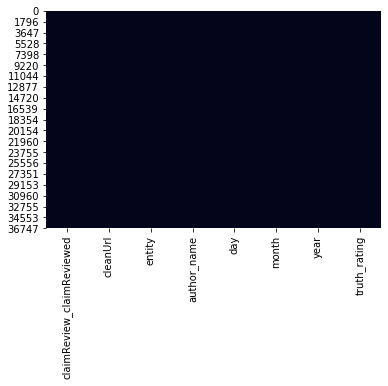

In [20]:
sns.heatmap(df.isnull(), cbar=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39218 entries, 0 to 39217
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   claimReview_claimReviewed  39216 non-null  object
 1   claimReview_datePublished  37913 non-null  object
 2   extra_entities_author      39218 non-null  object
dtypes: object(3)
memory usage: 919.3+ KB


# Préprocessing

In [5]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

df["claimReview_claimReviewed"] = df["claimReview_claimReviewed"].astype(str)

df.head()


,claimReview_claimReviewed,claimReview_datePublished,extra_entities_author
0,Finnish President Sauli NiinistÃ¶ posted a vid...,2019-10-07,[]
1,A supporter of U.S. Rep. Alexandria Ocasio-Cor...,2019-10-04,[]
2,A photograph shows a bride and groom during a ...,2019-10-04,[]
3,Canada legalized the medicinal use of cocaine.,2019-10-04,[]
4,"In September 2019, U.S. President Donald Trump...",2019-10-04,[]


### Removal of numbers

In [22]:
import re
import inflect
import string
from nltk.tokenize import word_tokenize

def containsDigit(words):

    for ch in words:
        if ch in string.digits:
            print(word)


def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def speciaux_numbers(text):
    text = re.sub('[-+]?[0-9]+',' ', text)
    text = re.sub('[^A-Za-z0-9 ]+',' ', text)
    return text

def clean_text(text):
    text=speciaux_numbers(text)
    tokens=word_tokenize(text)
    tokens=replace_numbers(tokens)
    containsDigit(tokens)
    text="".join([" "+i for i in tokens]).strip()
    return text

df["claimReview_claimReviewed"] = df["claimReview_claimReviewed"].apply(lambda text: clean_text(text))

df["cleanUrl"] = df["cleanUrl"].apply(lambda text: clean_text(text))

df["entity"] = df["entity"].apply(lambda text: clean_text(text))





### Removal of Punctuation

In [23]:
import re
PUNCT_TO_REMOVE=re.sub(r'[-.]','',string.punctuation)
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    text=text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    return re.sub(r'(?<!\d)[.,;:](?![\d\sa-zA-Z])',' ',text)

df["claimReview_claimReviewed"] = df["claimReview_claimReviewed"].apply(remove_punctuation)
df["cleanUrl"] = df["cleanUrl"].apply(remove_punctuation)
df["entity"] = df["entity"].apply(remove_punctuation)


df.head()

,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
0,Finnish President Sauli Niinist posted a video...,t co,Sauli Niinist White House Donald Trump,,7,10,2019,1
1,A supporter of U S Rep Alexandria Ocasio Corte...,twitter com,Alexandria Ocasio Cortez Climate change,,4,10,2019,2
2,A photograph shows a bride and groom during a ...,twitter com,The Handmaid s Tale TV series,,4,10,2019,-1
3,Canada legalized the medicinal use of cocaine,web archive org,Cocaine,,4,10,2019,-1
4,In September U S President Donald Trump signed...,archive is,Donald Trump Autism,,4,10,2019,3


## Removal of stopwords


In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /home/sid31/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

df["claimReview_claimReviewed"] = df["claimReview_claimReviewed"].apply(remove_stopwords)
df["cleanUrl"] = df["cleanUrl"].apply(remove_stopwords)
df["entity"] = df["entity"].apply(remove_stopwords)



df.head()


,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
0,Finnish President Sauli Niinist posted video W...,co,Sauli Niinist White House Donald Trump,,7,10,2019,1
1,supporter U Rep Alexandria Ocasio Cortez sugge...,twitter com,Alexandria Ocasio Cortez Climate change,,4,10,2019,2
2,photograph shows bride groom Handmaid Tale the...,twitter com,Handmaid Tale TV series,,4,10,2019,-1
3,Canada legalized medicinal use cocaine,web archive org,Cocaine,,4,10,2019,-1
4,September U President Donald Trump signed law ...,archive,Donald Trump Autism,,4,10,2019,3


## Removal of Frequent Word

In [26]:
#Je ne suis pas sur de faire ça 

In [27]:
from collections import Counter
cnt = Counter()
for text in df["claimReview_claimReviewed"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(15)

[('Says', 3900),
 ('Trump', 3147),
 ('President', 3012),
 ('U', 2756),
 ('climate', 2357),
 ('global', 2330),
 ('Donald', 2194),
 ('one', 2141),
 ('Obama', 2126),
 ('percent', 1823),
 ('shows', 1618),
 ('get', 1587),
 ('illegal', 1500),
 ('world', 1491),
 ('Bill', 1474)]

In [28]:
FREQWORDS={cnt.most_common(15)[0][0],cnt.most_common(15)[12][0]}

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["claimReview_claimReviewed"] = df["claimReview_claimReviewed"].apply(remove_freqwords)
df.head()

,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
0,Finnish President Sauli Niinist posted video W...,co,Sauli Niinist White House Donald Trump,,7,10,2019,1
1,supporter U Rep Alexandria Ocasio Cortez sugge...,twitter com,Alexandria Ocasio Cortez Climate change,,4,10,2019,2
2,photograph shows bride groom Handmaid Tale the...,twitter com,Handmaid Tale TV series,,4,10,2019,-1
3,Canada legalized medicinal use cocaine,web archive org,Cocaine,,4,10,2019,-1
4,September U President Donald Trump signed law ...,archive,Donald Trump Autism,,4,10,2019,3


## Removal of Rare words

In [29]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["claimReview_claimReviewed"] = df["claimReview_claimReviewed"].apply(remove_rarewords)

df.head()

,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
0,Finnish President Sauli Niinist posted video W...,co,Sauli Niinist White House Donald Trump,,7,10,2019,1
1,supporter U Rep Alexandria Ocasio Cortez sugge...,twitter com,Alexandria Ocasio Cortez Climate change,,4,10,2019,2
2,photograph shows bride groom Handmaid Tale the...,twitter com,Handmaid Tale TV series,,4,10,2019,-1
3,Canada legalized medicinal use cocaine,web archive org,Cocaine,,4,10,2019,-1
4,September U President Donald Trump signed law ...,archive,Donald Trump Autism,,4,10,2019,3


In [30]:
print(RAREWORDS)

{'Nasir', 'ACTU', 'Greens', 'Critic', 'talent', 'Zamfara', 'JESUS', 'COMING', 'Rufai', 'SOON'}


## Lemmatization

In [31]:
## normalement sa marche
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["claimReview_claimReviewed"] = df["claimReview_claimReviewed"].apply(lemmatize_words)
df["cleanUrl"] = df["cleanUrl"].apply(lemmatize_words)
df["entity"] = df["entity"].apply(lemmatize_words)
df.head()



[nltk_data] Downloading package wordnet to /home/sid31/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
0,Finnish President Sauli Niinist posted video W...,co,Sauli Niinist White House Donald Trump,,7,10,2019,1
1,supporter U Rep Alexandria Ocasio Cortez sugge...,twitter com,Alexandria Ocasio Cortez Climate change,,4,10,2019,2
2,photograph show bride groom Handmaid Tale them...,twitter com,Handmaid Tale TV series,,4,10,2019,-1
3,Canada legalized medicinal use cocaine,web archive org,Cocaine,,4,10,2019,-1
4,September U President Donald Trump signed law ...,archive,Donald Trump Autism,,4,10,2019,3


In [32]:
df.sample(200)

,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
27251,NASA prepping year old Alyssa Carson become fi...,thescicademy com,NASA,,11,10,2019,2
20420,spent virtually every weekend since Memorial D...,,,Charlie Crist,2,7,2010,3
31904,administration issued rule abortion ObamaCare ...,frc org,Patient Protection Affordable Care Act Abortio...,,21,3,2012,1
8616,city Oxford Alabama reacted Target transgender...,charlotteobserver com,Oxford Alabama Transgender,,27,4,2016,3
7172,Michele Bachmann said Christopher Columbus fir...,snopes com,Michele Bachmann Christopher Columbus,,11,10,2016,1
...,...,...,...,...,...,...,...,...
21767,state major river produce big hydropower,gefa georgia gov,,Tim Echols,15,10,2019,2
19633,Delta Air Lines broken promise made people Mem...,cohen house gov,Delta Air Lines,Steve Cohen,13,10,2019,3
37288,Arizona State Senator Sylvia Allen Explains Su...,truthorfiction com,Arizona Senate Sylvia Allen Arizona SB,,17,3,2015,-1
6666,Videos captured strange apocalyptic sound comi...,latinospost com,,,30,4,2015,2


## Downsampling et Upsampling des classes

In [33]:
#### Il est important de préciser qu'une grande partie des lignes de codes ci-dessous sont des tests d'UPSAMPLING / DOWNSAMPLING
#### que nous avons décidé de laisser.


from sklearn.utils import resample

df_1 = df[(df['truth_rating'] == 1)] # FALSE
df_2 = df[(df['truth_rating'] == 2)] # MIXTURE
df_3 = df[(df['truth_rating'] == 3)] # TRUE

df_selectionvariable1 = pd.concat([df_1, df_3]) # TRUE AND FALSE NO UPSAMPLING / DOWNSAMPLING
df_selectionvariable2 = pd.concat([df_1, df_2, df_3]) # TRUE, FALSE AND MIXTURE NO UPSAMPLING / DOWNSAMPLING



df_2_upsampled = resample(df_2, replace=True, n_samples=14436, random_state=123) # MIXTURE UPSAMPLED TO MATCH FALSE DF
df_3_upsampled = resample(df_3, replace=True, n_samples=14436, random_state=123) # TRUE UPSAMPLED TO MATCH FALSE DF

df_selectionvariable3 = pd.concat([df_1, df_3_upsampled]) # FALSE AND UPSAMPLED TRUE
df_selectionvariable4 = pd.concat([df_1, df_2_upsampled, df_3_upsampled]) # FALSE, MIXTURE UPSAMPLED AND TRUE UPSAMPLED



df_1_downsampled = resample(df_1, replace=True, n_samples=4385, random_state=123) # FALSE DOWNSAMPLED TO MATCH TRUE DF
df_2_downsampled = resample(df_2, replace=True, n_samples=4385, random_state=123) # MIXTURE DOWNSAMPLED TO MATCH TRUE DF

df_selectionvariable5 = pd.concat([df_1_downsampled, df_3]) # FALSE DOWNSAMPLED AND TRUE
df_selectionvariable6 = pd.concat([df_1_downsampled, df_2_downsampled, df_3]) # FALSE DOWNSAMPLED, MIXTURE DOWNSAMPLED AND TRUE



df_1_half_downsampled = resample(df_1, replace=True, n_samples=9411, random_state=123) # FALSE HALF_DOWNSAMPLED TO MATCH TRUE HALF_UPSAMPLED DF
df_2_half_downsampled = resample(df_2, replace=True, n_samples=9411, random_state=123) # MIXTURE HALF_DOWNSAMPLED TO MATCH TRUE HALF_UPSAMPLED DF
df_3_half_upsampled = resample(df_3, replace=True, n_samples=9411, random_state=123) # TRUE HALF_UPSAMPLED TO MATCH TRUE AND MIXTURE HALF_DOWNSAMPLED DF


df_selectionvariable7 = pd.concat([df_1_half_downsampled, df_3_half_upsampled]) # FALSE HALF_DOWNSAMPLED AND TRUE HALF_UPSAMPLED
df_selectionvariable8 = pd.concat([df_1_half_downsampled, df_2_half_downsampled, df_3_half_upsampled]) # FALSE HALF_DOWNSAMPLED, MIXTURE HALF_DOWNSAMPLED AND TRUE HALF_UPSAMPLED


df_1_half_mixture_downsampled = resample(df_1, replace=True, n_samples=6537, random_state=123) # FALSE DOWNSAMPLED TO MATCH HALF OF MIXTURE
df_3_half_mixture_upsampled = resample(df_3, replace=True, n_samples=6537, random_state=123) # TRUE UPSAMPLED TO MATCH HALF OF MIXTURE


df_selectionvariable9 = pd.concat([df_1_half_mixture_downsampled,df_2,df_3_half_mixture_upsampled]) #MIXTURE , TRUE DOWNSAMPLED FALSE UPSAMPLED TO BOTH MATCH MIXTURE


print ("df_1 : ", df_1.shape[0])
print ("df_2 : ", df_2.shape[0])
print ("df_3 : ", df_3.shape[0])

df_1 :  14436
df_2 :  13053
df_3 :  4385


In [34]:
print(df_selectionvariable5[df_selectionvariable5['truth_rating']==1].shape[0])
print(df_selectionvariable5[df_selectionvariable5['truth_rating']==2].shape[0])
print(df_selectionvariable5[df_selectionvariable5['truth_rating']==3].shape[0])

4385
0
4385


In [35]:
gg=df_selectionvariable7.sample(3000)
print(gg[gg['truth_rating']==1].shape[0])
print(gg[gg['truth_rating']==2].shape[0])
print(gg[gg['truth_rating']==3].shape[0])

1489
0
1511


## Split du dataframe selon la sélection des classes

In [36]:
df_selectionvariable1 = df_selectionvariable7
df_selectionvariable2 = df_selectionvariable9


## Classification Tache 1 (TRUE VS FALSE)

### Test de la classification avec toute les colonnes

In [37]:
df_selectionvariable1

,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
7776,DNC staffer killed mysterious explosion follow...,archive,Washington C,,12,8,2016,1
32495,Muslim country church able build synagogue for...,abcnews go com,Muslim,Franklin Graham,16,10,2019,1
3252,Eyewitness testimony confirms second shooter P...,snopes com,Parkland Florida,,19,2,2018,1
33101,Quotes Beto Rourke saying could throw two kind...,facebook com,Beto Rourke,,14,2,2019,1
10952,Muslims U specifically exempted legislative re...,taxalmanac org,,,13,4,2010,1
...,...,...,...,...,...,...,...,...
20088,car insurance rate decreased since decade ago ...,nj com,,Chris Christie,10,10,2019,3
20065,deficit track top trillion year took office,cbo gov,,Barack Obama,27,7,2011,3
6491,video show driverless Uber running red light S...,newsroom uber com,,,14,12,2016,3
17080,interview CORE national spokesman Niger Innis ...,core online org,Niger Innis MSNBC Nigger,,8,2,2002,3


In [38]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFO', RandomForestClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('LinearSVC', LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=3000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3,n_jobs=-1)))
#models.append(('MLP', MLPClassifier(activation = 'tanh', alpha= 0.05,hidden_layer_sizes=(50, 100, 50), solver='adam')))



In [39]:
DH=df_selectionvariable1.sample(5000)


mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
('cleanUrl', LabelEncoder()),
('entity', LabelEncoder()),
('author_name', LabelEncoder()),
('day',None),
('month',None),
('year',None),],df_out=True)
 
    
features = mapper.fit_transform(DH)
categories = DH['truth_rating']


print(features.shape)

seed=30
X_train,X_test,y_train,y_test=train_test_split(features,categories,train_size=0.7,random_state=seed,test_size=0.3)





(5000, 38979)


In [40]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    t0 = time()
    cv_results = cross_val_score(model, features, categories, cv=kfold, scoring=scoring)
    print("Réalisé en %0.3fs" % (time() - t0))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),
    cv_results.std())
    print(msg)

Réalisé en 75.058s
CART: 0.725200 (0.017371)
Réalisé en 41.962s
NB: 0.632600 (0.020977)
Réalisé en 46.921s
RFO: 0.746200 (0.021512)
Réalisé en 20.015s
LR: 0.725600 (0.013764)
Réalisé en 22.882s
LinearSVC: 0.720400 (0.013351)
Réalisé en 117.730s
KNN: 0.655200 (0.022167)


[Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'RFO'),
 Text(0, 0, 'LR'),
 Text(0, 0, 'LinearSVC'),
 Text(0, 0, 'KNN')]

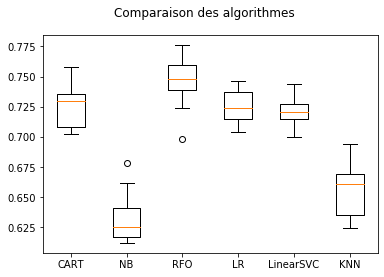

In [42]:
fig=plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

### Sélection des variables avec les fonctions features_selection de sklearn

### Classement des scores SelectKBest ordre décroissant

In [41]:
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)


selected_features_df = pd.DataFrame({'Feature':list(X_train),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

/home/sid31/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp


,Feature,Scores
38974,entity,27614.493344
38975,author_name,25411.276301
38973,cleanUrl,4038.992421
38976,day,158.855615
14373,claimReview_claimReviewed_global,46.094089
...,...,...
38966,claimReview_claimReviewed_zones allow,NaN
38967,claimReview_claimReviewed_zookeeper,NaN
38968,claimReview_claimReviewed_zookeeper paderborn,NaN
38971,claimReview_claimReviewed_zuma,NaN


## Sélection de variable Tache 1 (Manuellement)

### Test sans la colonne author name

In [43]:
df_without_author = DH.filter(['claimReview_claimReviewed','cleanUrl','entity','day','month','year','truth_rating'], axis=1)

mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
    ('cleanUrl', LabelEncoder()),
    ('entity', LabelEncoder()),
    ('day',None),
    ('month',None),
    ('year',None),])
 
features = mapper.fit_transform(df_without_author)
categories = df_without_author['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

Réalisé en 6.050s
Accuracy moyenne :  0.7246  standard deviation 0.023597457490161962


### Sans la colonne date 

In [44]:
df_without_date = DH.filter(['claimReview_claimReviewed','cleanUrl','entity','author_name','truth_rating'], axis=1)

mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
('cleanUrl', LabelEncoder()),
('entity', LabelEncoder()),
('author_name', LabelEncoder()),])
 
features = mapper.fit_transform(df_without_date)
categories = df_without_date['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

Réalisé en 5.802s
Accuracy moyenne :  0.7228  standard deviation 0.02082690567511172


### Sans la colonne Url

In [45]:
df_without_url = DH.filter(['claimReview_claimReviewed','entity','author_name','day','month','year','truth_rating'], axis=1)

mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
('entity', LabelEncoder()),
('author_name', LabelEncoder()),
('day',None),
('month',None),
('year',None),])
 
features = mapper.fit_transform(df_without_url)
categories = df_without_url['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

Réalisé en 6.728s
Accuracy moyenne :  0.7265999999999999  standard deviation 0.019184368636991956


### Sans la colonne Entity

In [46]:
df_without_entity = DH.filter(['claimReview_claimReviewed','cleanUrl','author_name','day','month','year','truth_rating'], axis=1)

df_without_entity.head()
mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
('cleanUrl', LabelEncoder()),
('author_name', LabelEncoder()),
('day',None),
('month',None),
('year',None),])

features = mapper.fit_transform(df_without_entity)
categories = df_without_entity['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

Réalisé en 6.260s
Accuracy moyenne :  0.7303999999999999  standard deviation 0.023303218661807235


### Sans la colonne claimReview

In [47]:
df_without_claim_Review = DH.filter(['entity','cleanUrl','author_name','day','month','year','truth_rating'], axis=1)

df_without_claim_Review.head()
mapper = DataFrameMapper([
('cleanUrl', LabelEncoder()),
('author_name', LabelEncoder()),
('day',None),
('month',None),
('year',None),])

features = mapper.fit_transform(df_without_claim_Review)
categories = df_without_claim_Review['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

Réalisé en 0.157s
Accuracy moyenne :  0.5661999999999999  standard deviation 0.022670685918163114


## Classification Tache 2 (TRUE,FALSE VS MIXTURE)

In [48]:

def ChangeValue(text):
    new_text=4
    if(text==1 or text==3):
        return new_text
    else:
        return text
        
        

In [64]:
DFF2.sample(2000)

,claimReview_claimReviewed,cleanUrl,entity,author_name,day,month,year,truth_rating
33106,George Soros arrested Switzerland web crime ba...,cbc ca,George Soros Barack Obama,,8,2,2019,4
8400,Hillary Clinton refused participate final deba...,cnn com,Hillary Clinton Donald Trump Democratic Party ...,,26,5,2016,2
2872,Anthropologist Jane Goodall likened Donald Tru...,nytimes com,Jane Goodall Donald Trump,,25,4,2018,2
8540,Obamacare questionnaire asked respondent wheth...,facebook com,,,6,5,2016,2
14935,Ms passed chance candy used lure shy little al...,u imdb com,Product placement,,11,5,2011,4
...,...,...,...,...,...,...,...,...
17106,Senator John McCain delivered speech Vietnam P...,mccain senate gov,John McCain,,20,10,2001,4
33219,Kavanaugh accuser brother firm linked Fusion GPS,washingtonpost com,Fusion GPS,,11,10,2019,4
26173,Since introduced budget first budget March cre...,nj com,,Chris Christie,13,10,2019,2
2156,supporter U Rep Alexandria Ocasio Cortez sugge...,twitter com,Alexandria Ocasio Cortez Climate change,,4,10,2019,2


In [69]:
DFF2=df_selectionvariable2.copy()

DFF2['truth_rating']=DFF2['truth_rating'].apply(ChangeValue)


DFF2=DFF2.sample(5000)

mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
('cleanUrl', LabelEncoder()),
('entity', LabelEncoder()),
('author_name', LabelEncoder()),
('day',None),
('month',None),
('year',None),],df_out=True)

features1 = mapper.fit_transform(DFF2)
categories1 = DFF2['truth_rating']

seed=30
X_train1,X_test1,y_train1,y_test1=train_test_split(features1,categories1,train_size=0.7,random_state=seed,test_size=0.3)


In [51]:
results1 = []
names1 = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    t0 = time()
    cv_results = cross_val_score(model, features1, categories1, cv=kfold, scoring=scoring)
    print("Réalisé en %0.3fs" % (time() - t0))
    results1.append(cv_results)
    names1.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),
    cv_results.std())
    print(msg)

Réalisé en 260.141s
CART: 0.697000 (0.024302)
Réalisé en 26.219s
NB: 0.572200 (0.017400)
Réalisé en 78.238s
RFO: 0.713800 (0.026914)
Réalisé en 7.156s
LR: 0.712800 (0.021037)
Réalisé en 6.850s
LinearSVC: 0.707200 (0.018203)
Réalisé en 114.503s
KNN: 0.635400 (0.021965)


[Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'RFO'),
 Text(0, 0, 'LR'),
 Text(0, 0, 'LinearSVC'),
 Text(0, 0, 'KNN')]

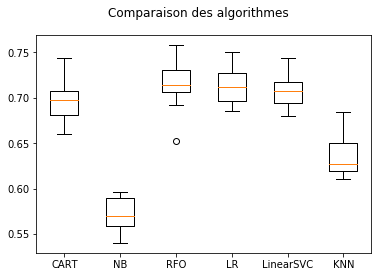

In [53]:
fig=plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax=fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)

### Selection des variables avec les fonctions features_selection de sklearn

### Classement des scores 

In [70]:
select_feature = SelectKBest(chi2, k=5).fit(X_train1, y_train1)
selected_features_df = pd.DataFrame({'Feature':list(X_train1.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

/home/sid31/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:167: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp


,Feature,Scores
40918,entity,51746.703624
40919,author_name,44876.113321
40917,cleanUrl,10987.568111
40920,day,76.837855
33745,claimReview_claimReviewed_sound,35.192847
...,...,...
40903,claimReview_claimReviewed_zika virus,NaN
40905,claimReview_claimReviewed_zimbabwe continues,NaN
40909,claimReview_claimReviewed_zip,NaN
40910,claimReview_claimReviewed_zip nada,NaN


## selection de variable Tache 2 (Manuellement)

### on essaye sans la colonne author name

In [ ]:
df_without_author_Tache2 = DFF2.filter(['claimReview_claimReviewed','cleanUrl','entity','day','month','year','truth_rating'], axis=1)

mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
    ('cleanUrl', LabelEncoder()),
    ('entity', LabelEncoder()),
    ('day',None),
    ('month',None),
    ('year',None),])
 
features = mapper.fit_transform(df_without_author_Tache2)
categories = df_without_author_Tache2['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

### sans la colonne date 

In [55]:
df_without_date_Tache2 = DFF2.filter(['claimReview_claimReviewed','cleanUrl','entity','author_name','truth_rating'], axis=1)

mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
('cleanUrl', LabelEncoder()),
('entity', LabelEncoder()),
('author_name', LabelEncoder()),])
 
features = mapper.fit_transform(df_without_date_Tache2)
categories = df_without_date_Tache2['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

Réalisé en 6.113s
Accuracy moyenne :  0.7072  standard deviation 0.017417232845661774


### sans la colonne Url

In [56]:
df_without_url_Tache2 = DFF2.filter(['claimReview_claimReviewed','entity','author_name','day','month','year','truth_rating'], axis=1)

mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
('entity', LabelEncoder()),
('author_name', LabelEncoder()),
('day',None),
('month',None),
('year',None),])
 
features = mapper.fit_transform(df_without_url_Tache2)
categories = df_without_url_Tache2['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

Réalisé en 6.959s
Accuracy moyenne :  0.7074  standard deviation 0.017459667808981925


### sans la colonne Entity

In [57]:
df_without_entity_Tache2 = DFF2.filter(['claimReview_claimReviewed','cleanUrl','author_name','day','month','year','truth_rating'], axis=1)

df_without_entity.head()
mapper = DataFrameMapper([
('claimReview_claimReviewed', TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),)),
('cleanUrl', LabelEncoder()),
('author_name', LabelEncoder()),
('day',None),
('month',None),
('year',None),])

features = mapper.fit_transform(df_without_entity_Tache2)
categories = df_without_entity_Tache2['truth_rating']
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
clf = LogisticRegression()
scoring = 'accuracy'
t0 = time()
score = cross_val_score(clf, features, categories, cv=k_fold, scoring=scoring)
print("Réalisé en %0.3fs" % (time() - t0))
print ('Accuracy moyenne : ',score.mean(),
 ' standard deviation', score.std())

Réalisé en 6.681s
Accuracy moyenne :  0.7095999999999999  standard deviation 0.019489484344127728
